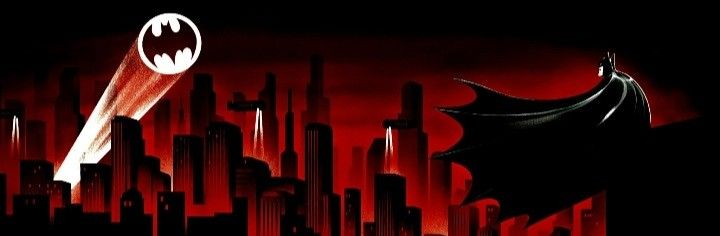

# Laboratorio 1: MovieAlpes

- Juan Camilo Colmenares - 202011866
- Juan Montealegre
- David 

El objetivo de este laboratorio es realizar para MovieAlpes todo el proceso de carectización e identificación de patrones que puedan ser utilizados para entender las preferencias de sus usuarios e identificar los atributos que influyen en las calificaciones positivas. El objetivo final es mejorar la experiencia de los usuarios proporcionando recomendaciones más relevantes y personalizadas a los gustos de ellos. La solución a este problema será basada en una tarea de agrupación

In [120]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

In [82]:
df = pd.read_csv('./data/data.csv', sep=';')

## 1. Entendimiento de los datos

En esta etapa es importante saber si los datos son o no suficientes para el alcance del proyecto y, en caso de serlo, entender bien sus características para poder definir el camino de limpieza y preparación para lograr el objetivo del proyecto.
En particular, es importante realizar un perfilamiento completo que incluya lo descrito en el manterial del curso -ver infografía de entendimiento de datos-, donde se incluye estadística descriptiva y gráficos sobre los datos, señalando sus principales estadísticos: media, varianza, desviación estándar, etc., para el caso de las columnas numéricas. En caso de datos categóricos recuerde que es importante conocer las categorías y en qué proporción se presentan. Tener en cuenta que una parte fundamental de esta etapa está relacionada con el análisis a nivel de calidad de datos y, en particular, a nivel de las dimensiones de calidad (completitud, unicidad, consistencia, validez) para identificar las actividades de preparación que requieren los datos.

### 1.1 Perfilamiento de datos

In [3]:
df.shape

(7471, 18)

In [4]:
df.head()

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
0,1,1,tt0103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi
1,10,17,tt0231050,tvSeries,ToransufÃ´mÃ¢: KÃ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure
2,13,23,tt0253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
3,21,55,tt0369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime
4,28,87,tt0439547,movie,2 Filhos de Francisco: A HistÃ³ria de ZezÃ© di...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                7471 non-null   int64  
 1   index            7471 non-null   int64  
 2   tconst           7471 non-null   object 
 3   titleType        7471 non-null   object 
 4   originalTitle    7471 non-null   object 
 5   isAdult          7470 non-null   float64
 6   startYear        7470 non-null   float64
 7   runtimeMinutes   7470 non-null   object 
 8   averageRating    7470 non-null   float64
 9   numVotes         7470 non-null   float64
 10  ordering         7470 non-null   float64
 11  region           7470 non-null   object 
 12  language         7470 non-null   object 
 13  types            7470 non-null   object 
 14  attributes       7470 non-null   object 
 15  isOriginalTitle  7470 non-null   float64
 16  main_genre       7470 non-null   object 
 17  secondary_genr

In [6]:
df.describe()

,#,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


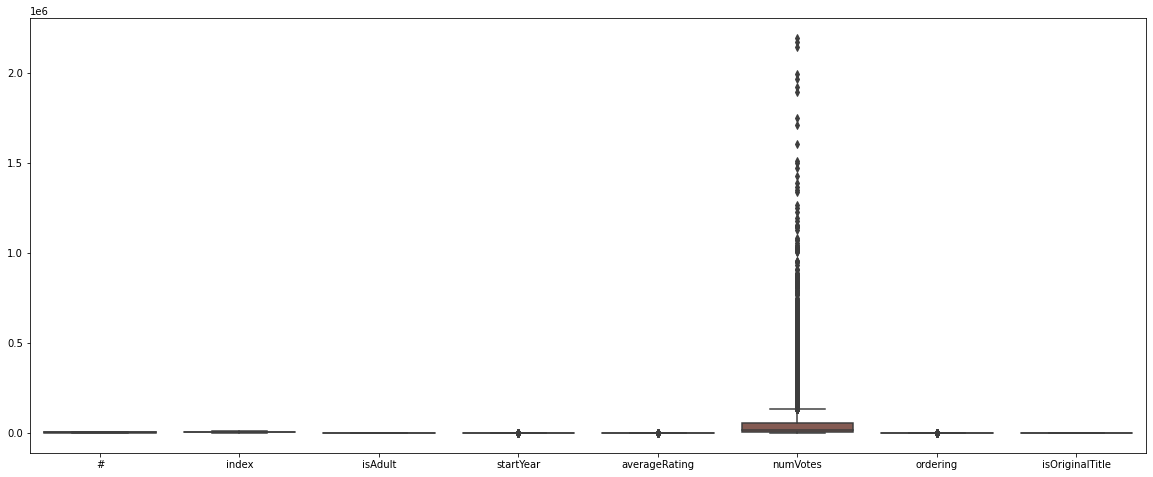

In [7]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

A continuación esetudiaremos los datos separandolos entre datos númericos y categoricos

In [8]:
cols_float = df.select_dtypes(include = ['float']).columns
cols_int = df.select_dtypes(include = ['int64']).columns
print(cols_float, cols_int)

Index(['isAdult', 'startYear', 'averageRating', 'numVotes', 'ordering',
       'isOriginalTitle'],
      dtype='object') Index(['#', 'index'], dtype='object')


Al comparar el diccionario que se nos dio para validar que el tipo de dato se cumple hallamos que hay datos que aparecen como númericos pero en realidad deberían ser datos categoricos. Este es el caso de `isAdult` y `isOriginalTitle` **OJITOOOO Hay que revisar ya que no estoy del todo seguro de esta parte porque al finla del día isAdult dice que es categorica pero dice que solo puede ser 0 o 1 y isOriginalTItle ni esta en el diccionario y de esto se habla más adelante**


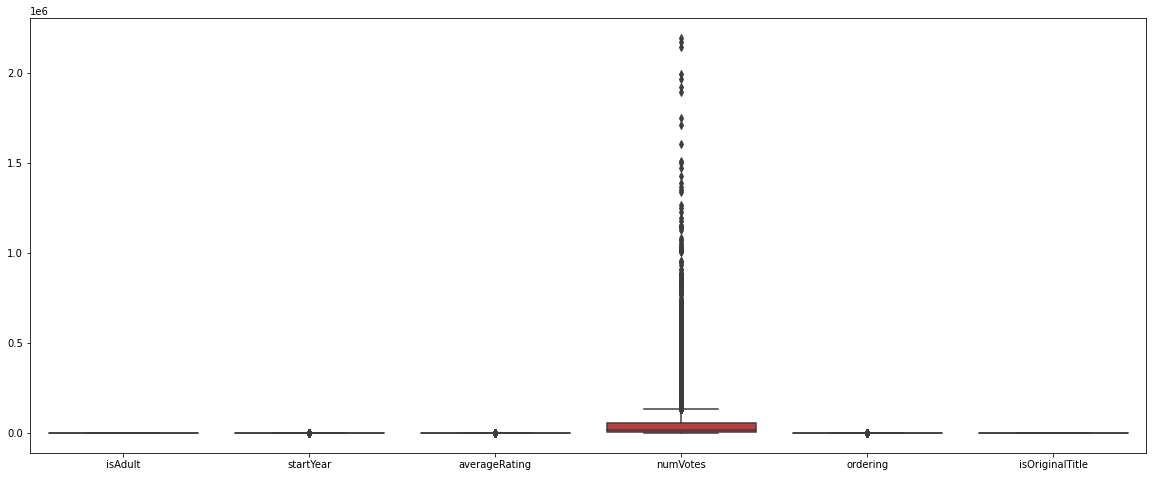

In [9]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df[cols_float], orient="v")

In [10]:
#El dato que más llamá la atención respecto a su distribución es numVotes ya que esta es altamente dispersa,
#por eso entramos a ver que esta pasando más a detalle
df[cols_float].describe()

,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


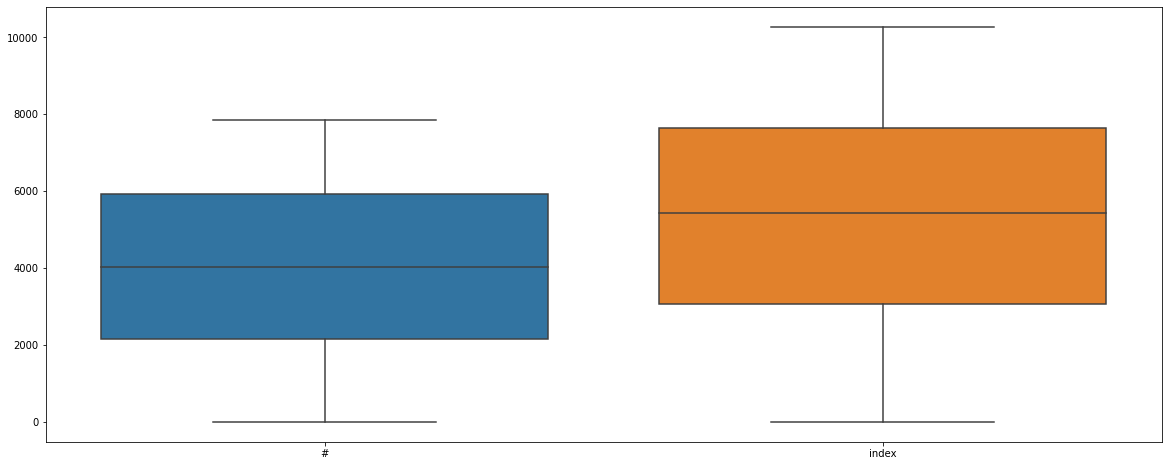

In [11]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df[cols_int], orient="v")

In [12]:
cols_non_number = df.select_dtypes(include = ['object']).columns
cols_non_number

Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')

Cabe mencionar que al comparar el diccionario que se nos dio vemos que hay datos que aparecen como categoricos pero en realidad deberían ser datos númericos. Este es el caso de `tconst` y `runtimeMinutes`


In [13]:
df[cols_non_number].describe()

,tconst,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
count,7471,7471,7471,7470,7470,7470,7470,7470,7470,7470
unique,7466,7,7290,362,4,1,5,1,22,26
top,tt0395843,movie,Home,60,IN,en,imdbDisplay,\N,Drama,Drama
freq,2,4673,3,534,5590,7470,7395,7470,1767,2428


Aquí toca hablar de lo que implica que el valor sea uno, que pues en realidad siginifca que toca eliminar la columna

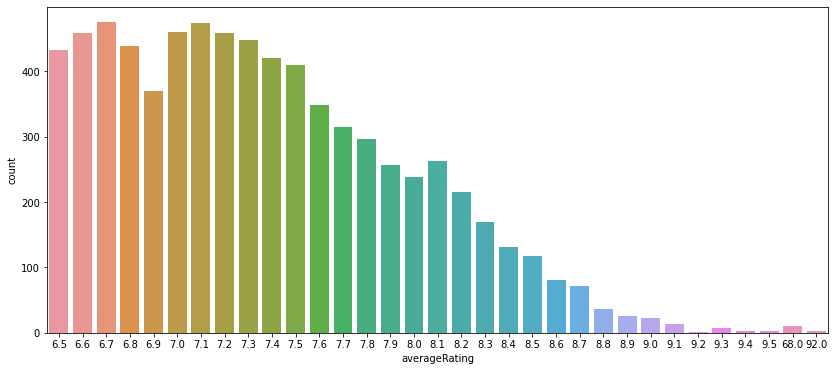

In [14]:
plt.figure(figsize=(14, 6))
sns.countplot(x='averageRating', data=df)
plt.show()

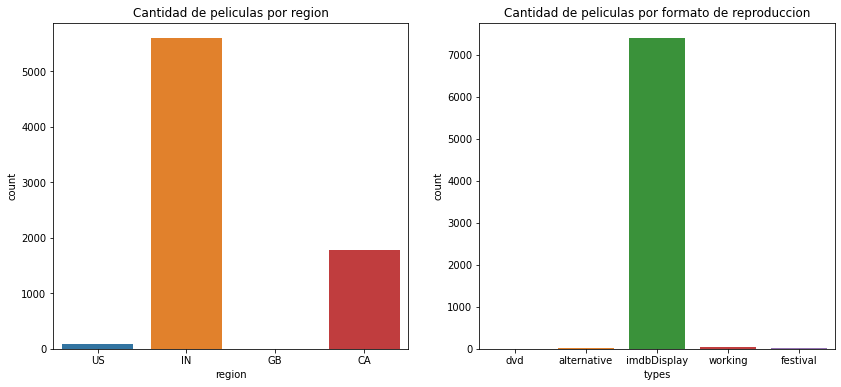

In [109]:
#fig, axs = plt.subplots(1, 2)
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
g1 = sns.countplot(x='region', data=df, ax=my_grid[0]) #.plot(ax = axs[0])
g2 = sns.countplot(x='types', data=df, ax=my_grid[1]) #.plot(ax= axs[1])
g1.set_title('Cantidad de peliculas por region')
g2.set_title('Cantidad de peliculas por formato de reproduccion')
plt.show()


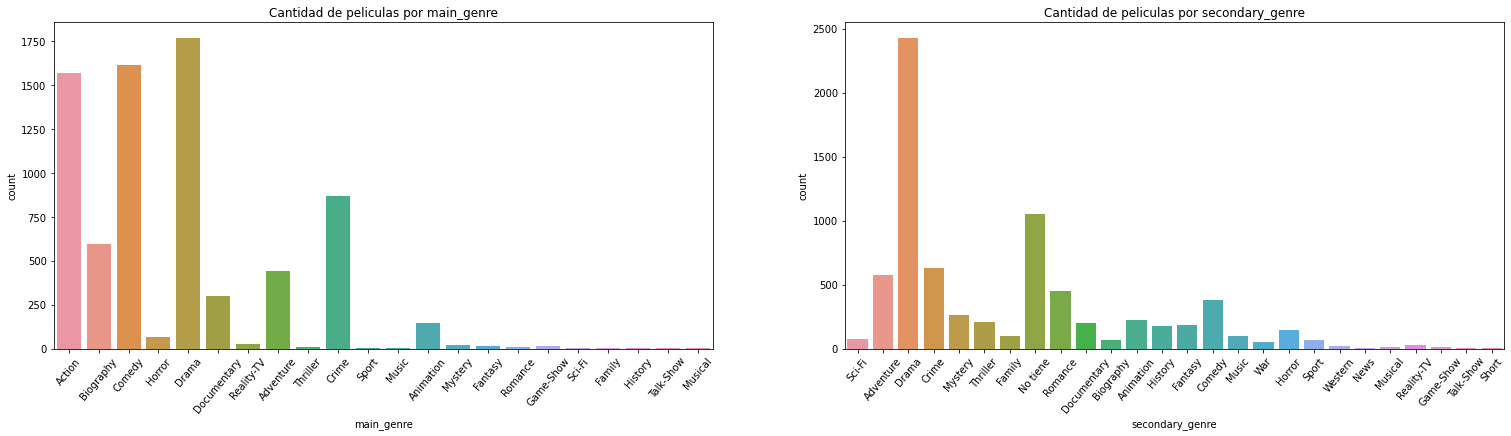

In [110]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(26,6))
g1 = sns.countplot(x='main_genre', data=df, ax=my_grid[0]) #.plot(ax = axs[0])
g2 = sns.countplot(x='secondary_genre', data=df, ax=my_grid[1]) #.plot(ax= axs[1])
g1.set_title('Cantidad de peliculas por main_genre')
g2.set_title('Cantidad de peliculas por secondary_genre')
g1.set_xticklabels(g1.get_xticklabels(), rotation=50)
g2.set_xticklabels(g2.get_xticklabels(), rotation=50)
plt.show()

<AxesSubplot:title={'center':'Cantidad de peliculas por puntuación divida en sus regiones'}, xlabel='averageRating'>

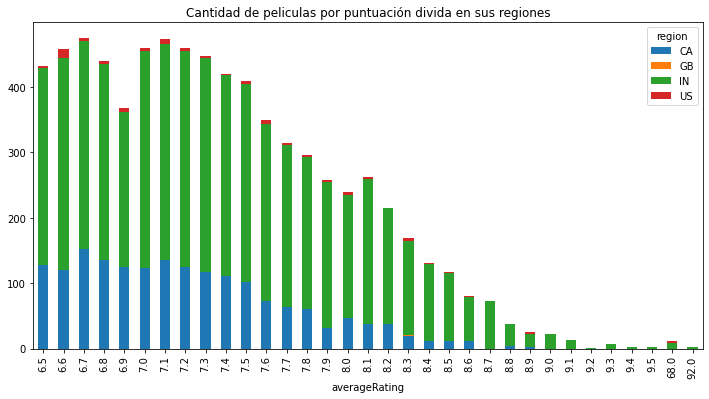

In [48]:
title_gra = 'Cantidad de peliculas por puntuación divida en sus regiones'
df.groupby(['averageRating', 'region']).size().unstack().plot(kind='bar', stacked=True, title=title_gra, figsize=(12, 6))

A continuación veremos graficamente las relaciones que tienen las diferentes variables entre si, más que todo las númericas pero también mostraremos la relación que tienen las númericas con una categorica en especifico que es main_genre ya que consideramos que esta dará insights importantes para el análisis. Además para las generar estas gráficas se hizo una copia del df original con el motivo de solo usar las columnas que queriamos y adicionalmente limpiar un outlier que cambiaba drasticamente los datos. Este error era que algunos ratings tenian valor mayores a 10 lo cual no es correcto y por lo tanto lo arreglamos dividiendo estos valores entre 10.

In [17]:
cols_rela = ["main_genre", "runtimeMinutes", "averageRating", "startYear", "numVotes"] #, "averageRating"]
df_relacion = df[cols_rela].copy()
#PARA EL GRUPO - Esto toca tenerlo en consideración si se deja, ya que estariamos alterando los datos como se dice en la explicación de arriba
df_relacion.loc[df["averageRating"] >= 10, "averageRating"] = df["averageRating"]/10
df_relacion

,main_genre,runtimeMinutes,averageRating,startYear,numVotes
0,Action,137,8.6,1991.0,1128166.0
1,Action,22,6.6,2000.0,577.0
2,Biography,150,8.5,2002.0,860569.0
3,Action,120,7.5,2004.0,417391.0
4,Biography,132,6.9,2005.0,5946.0
...,...,...,...,...,...
7466,Drama,108,7.3,2019.0,3779.0
7467,Animation,25,7.5,2019.0,3318.0
7468,Drama,99,7.2,2019.0,3346.0
7469,Drama,84,6.9,2019.0,3646.0


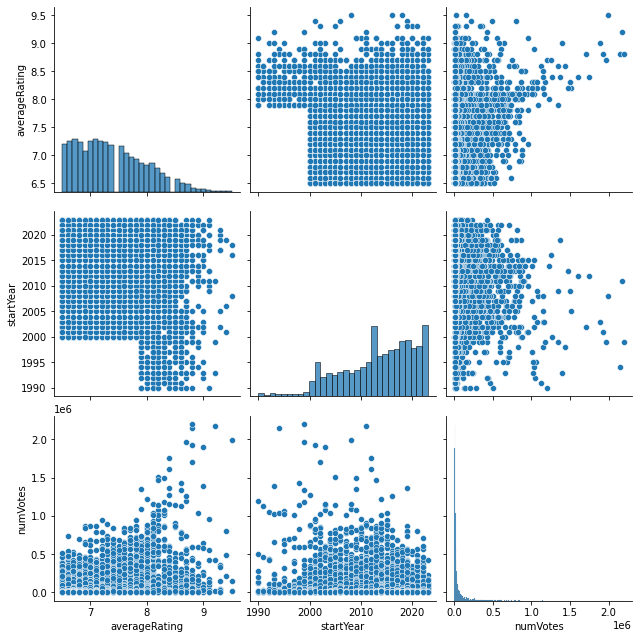

In [18]:
sns.pairplot(df_relacion, height=3,kind='scatter')

c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1008x432 with 0 Axes>

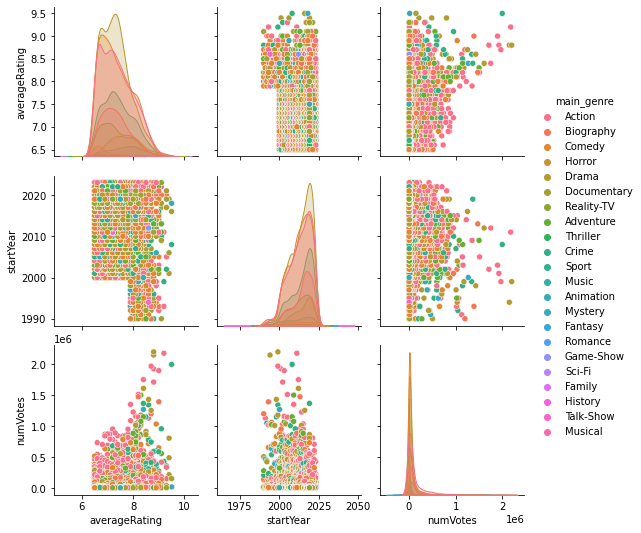

In [19]:
plt.figure(figsize=(14, 6))
sns.pairplot(data=df_relacion, hue="main_genre")
plt.show()

#### Análisis 

1. Observamos que la distribución del número de votos (numVotes) es muy desproporcional, teniendo una distribución estandar de 1.640233e+05, esto es algo que tenemos que tener en cuenta a la hora de realizar el modelo ya que deberiamos eliminar outliers

2. En el averageRating vemos que hay datos que se tendran que corregir / limpiar a la hora de preparar los datos para construir el modelo. El principal error es que hay datos los cuales no pertencen al conjunto dado en el diccionario el cual es (0 a 10), es por esto que los datos que sean mayores a 10 tendran que ser transformados. Una opción sería divir el valor entre 10, ya que si es 92 quedaría como 9.2 el cual es un valor permitido

3. Hay regiones como GB o US las cuales tienen muy pocos datos comparados con IN, esto se debe tener presente a la hora de construir el modelo

4. Hay datos que deberían ser númericos pero son categoricos y datos que son categoricos pero deberían ser númeriocos, esto ser va a corregir antes de crear el modelo 

### 1.2 Análisis de calidad de datos


### 1.2.1 Completitud

In [20]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

numVotes           0.000134
ordering           0.000134
main_genre         0.000134
isOriginalTitle    0.000134
attributes         0.000134
types              0.000134
language           0.000134
region             0.000134
secondary_genre    0.000134
averageRating      0.000134
runtimeMinutes     0.000134
startYear          0.000134
isAdult            0.000134
index              0.000000
originalTitle      0.000000
titleType          0.000000
tconst             0.000000
#                  0.000000
dtype: float64

A priory se ve que hay un bajo porcentaje de valores nulos, pero hay varias columnas que no aparecen en el diccionario que se nos dio y que carecen de valor para realizar el analisis por lo cual podrían ser removidas. Estas columnas son `#`, `index`, `ordering` y `isOriginalTitle`

### 1.2.2 Unicidad

In [21]:
# Se muestran algunos registros de canciones aparentemente repetidos
# Los repetidos se pueden analizar por la totalidad de sus valores o como en este caso por un subconjunto de estos
df.loc[df.duplicated(subset = df.columns[1:], keep = False)].sort_values(by = 'originalTitle').head(10)

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
6036,6403,8429,tt0395843,tvSeries,CSI: NY,0.0,2004.0,43,6.9,48364.0,31.0,CA,en,imdbDisplay,\N,0.0,Action,Crime
6037,6403,8429,tt0395843,tvSeries,CSI: NY,0.0,2004.0,43,6.9,48364.0,31.0,CA,en,imdbDisplay,\N,0.0,Action,Crime
12,88,299,tt12443930,MOVIE,"Les choses qu'on dit, les choses qu'on fait",0.0,2020.0,122,6.9,2689.0,39.0,US,en,imdbDisplay,\N,0.0,Comedy,Drama
5928,88,299,tt12443930,MOVIE,"Les choses qu'on dit, les choses qu'on fait",0.0,2020.0,122,6.9,2689.0,39.0,US,en,imdbDisplay,\N,0.0,Comedy,Drama
6034,6402,8424,tt0390538,movie,Tarnation,0.0,2003.0,88,7.1,6645.0,1.0,CA,en,imdbDisplay,\N,0.0,Biography,Documentary
6035,6402,8424,tt0390538,movie,Tarnation,0.0,2003.0,88,7.1,6645.0,1.0,CA,en,imdbDisplay,\N,0.0,Biography,Documentary


In [22]:
print('Total de peliculas repetidas:', df.loc[df.duplicated(subset = df.columns[1:], keep = False)].shape[0])

Total de peliculas repetidas: 6


Como podemos ver es baja la cantidad de duplicados que se obtienen de los datos,pero de igual manera estos datos seran eliminados para poder construir el modelo

### 1.2.3 Consistencia

In [23]:
df.titleType.value_counts()

movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
MOvie              3
Movie              1
Name: titleType, dtype: int64

In [27]:
df.averageRating.unique()

array([ 8.6,  6.6,  8.5,  7.5,  6.9,  7.9, 68. ,  6.8,  8.4,  7.3,  7.7,
        7.1,  7. ,  6.7,  8.9,  8.3,  6.5,  8.1,  9. ,  7.6,  8. ,  7.8,
        7.2,  7.4,  9.1,  8.8,  8.2,  8.7,  9.2,  9.4, 92. ,  9.3,  9.5,
        nan])

En este punto encontramos multiples columnas que ponen en peligro las consistencia:
1. En la columna titleType encontramos que se estan repitiendo las mismas categorias como si fuesen diferentes devido a combinaciones entre minusculas y mayuscalas, esto debera ser limpiado y corregido

2. La columna averageRating tiene valores no permitidos ya que se salen del rango de 1 a 10, esto habra que corregirlo antes de construir el modelo


### 1.2.4 Validez

In [25]:
df.isAdult.value_counts()

0.0    7470
Name: isAdult, dtype: int64

In [26]:
df.types.value_counts()

imdbDisplay    7395
working          38
alternative      24
festival         11
dvd               2
Name: types, dtype: int64

In [49]:
df.region.value_counts()

IN    5590
CA    1780
US      93
GB       4
Name: region, dtype: int64

Las columnas a tener y limpiar para mejorar la validez son las siguientes:

1. En la columna isAdult encontramos que solo esta el dato 0, cuando segun el diccionario también deberían haber peliculas con 1. Al solo haber 0s esta columna no aporta mucho valor

2. En la columna types se muestran los diferentes dispositivos en donde se reproducen las peliculas pero hay que tener cuidado con estos datos ya que imdbDisplay domina superiormente a los otros tipos, por lo tanto hay que tener cuidado para construir el modelo

3. En la columna region pasa lo mismo que con types, hay columnas como GB que en comparación con IN quedan pequeñas y no aporta muchos datos, esto hay que tenerlo en cuenta a la hora de construir el modelo

## 2. Preparación de datos

Es el procedimiento llevado a cabo para transformar los valores actuales de acuerdo con el objetivo de negocio a resolver, las técnicas y algoritmos a utilizar, y la calidad de los datos. Incluye la limpieza de los datos, como el manejo de los datos nulos (missing values) y los valores atípicos (outliers) con la justificación respectiva.

### 2.1 Limpieza y correción de datos

In [85]:
df.titleType = df.titleType.str.lower()
df.titleType.unique()

array(['movie', 'tvseries', 'tvminiseries', 'tvmovie'], dtype=object)

In [ ]:
print(df.isAdult.unique(), df.isOriginalTitle.unique(), df.attributes.unique(), df.language.unique())

In [84]:
df = df.drop(['#', 'index', 'isAdult', 'attributes', 'isOriginalTitle', 'language', 'ordering'], axis=1)

In [87]:
df.loc[df["averageRating"] >= 10, "averageRating"] = df["averageRating"]/10

In [92]:
df.averageRating.unique()

array([8.6, 6.6, 8.5, 7.5, 6.9, 7.9, 6.8, 8.4, 7.3, 7.7, 7.1, 7. , 6.7,
       8.9, 8.3, 6.5, 8.1, 9. , 7.6, 8. , 7.8, 7.2, 7.4, 9.1, 8.8, 8.2,
       8.7, 9.2, 9.4, 9.3, 9.5, nan])

Se busca en los registros por nombre de pelicula los valores duplicados.

In [93]:
# Se eliminan los repetidos que se hayan identificado aún cuando la columna id sea diferente
df.drop_duplicates(subset = df.columns[1:], inplace = True)

In [94]:
print('Total de peliculas repetidas:', df.loc[df.duplicated(subset = df.columns[1:], keep = False)].shape[0])

Total de peliculas repetidas: 0


In [95]:
df.dropna(inplace = True)
df.shape

(7467, 12)

In [96]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

tconst             0.0
titleType          0.0
originalTitle      0.0
startYear          0.0
runtimeMinutes     0.0
averageRating      0.0
numVotes           0.0
ordering           0.0
region             0.0
types              0.0
main_genre         0.0
secondary_genre    0.0
dtype: float64

In [50]:
# Dado que se tienen fechas no estandarizadas, se aplica un preprocesamiento que garantice dicha estandarización
# df['startYear'] = pd.to_datetime(df['startYear'], format='%Y')

In [97]:
# df.startYear.sample(5)

7023    2016.0
4904    2021.0
5649    2020.0
577     2002.0
7016    2014.0
Name: startYear, dtype: float64

In [98]:
df.sample(5)

,tconst,titleType,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,types,main_genre,secondary_genre
2342,tt14134550,tvseries,Odd Taxi,2021.0,23,8.4,4929.0,8.0,IN,imdbDisplay,Animation,Comedy
6271,tt0850253,movie,Battle in Seattle,2007.0,99,6.6,14993.0,22.0,CA,imdbDisplay,Action,Drama
2092,tt13022984,movie,Khuda Haafiz Chapter II: Agni Pariksha,2022.0,144,7.5,14470.0,4.0,IN,imdbDisplay,Action,Crime
3955,tt3741834,movie,Lion,2016.0,118,8.0,243235.0,44.0,IN,imdbDisplay,Biography,Drama
6057,tt0413893,movie,Cha no aji,2004.0,143,7.6,6902.0,7.0,CA,imdbDisplay,Comedy,Fantasy


### 2.2 Manejo de valores átipicos (outliers)

**Muchachos creo que esto en realidad no hay que tocarlo porque es un poco raro el tema de outliers y tampoco hay que normalizar ni es algo que veo que de momento se haga en alguna parte del curso**

### 2.3 Preparación de variables a utilizar para construir el modelo

De momento nos enfocaremos para crear el modelo en algunas de las varaibles cuantitativas que consideramos de mayor importancia y que además tienen una desviación estandar baja

In [111]:
cols_select = ["runtimeMinutes", "averageRating", "startYear"]
df_model = df[cols_select].copy()

In [113]:
df_model.duplicated(keep = False).sum()

1658

In [115]:
df_model.drop_duplicates(keep = 'first', inplace = True)

In [116]:
df_model.duplicated(keep = False).sum()

0

In [117]:
df_model.shape

(6532, 3)

In [125]:
df_model.sample(10)

,runtimeMinutes,averageRating,startYear
604,99,6.8,2004.0
15,78,7.0,2016.0
7013,111,6.9,2016.0
5482,119,7.5,2022.0
4890,75,7.4,2018.0
3700,60,8.0,2016.0
3011,24,8.1,2011.0
2136,36,8.0,2020.0
1877,109,7.4,2009.0
2530,45,8.1,2010.0


In [128]:
df_model.runtimeMinutes.unique()

array(['137', '22', '150', '120', '132', '117', '111', '130', '30', '122',
       '81', '131', '78', '112', '102', '360', '109', '99', '83', '93',
       '90', '104', '98', '152', '92', '115', '95', '60', '96', '82',
       '100', '108', '165', '42', '97', '142', '134', '24', '94', '147',
       '89', '106', '75', '118', '175', '116', '103', '105', '76', '176',
       '101', '91', '136', '121', '107', '243', '77', '86', '614', '119',
       '141', '157', '25', '680', '226', '47', '181', '145', '84', '125',
       '23', '174', '45', '21', '180', '144', '133', '127', '195', '44',
       '561', '15', '160', '170', '113', '327', '178', '189', '129',
       '128', '185', '135', '55', '155', '126', '138', '123', '169',
       '140', '139', '154', '143', '88', '201', '179', '224', '87', '188',
       '124', '110', '594', '50', '43', '216', '167', '11', '186', '376',
       '156', '114', '210', '161', '276', '28', '\\N', '26', '158', '73',
       '149', '187', '389', '61', '146', '59', '184', 

In [126]:
df_model.dropna(inplace = True)

## 3. Modelamiento 
En este paso se lleva a cabo la elección del modelo con el que queremos cumplir nuestra tarea de aprendizaje.
En este caso, deben usar el algoritmo de K-Means y deberán compararlo con otros dos algoritmos de agrupación, como clustering jerárquico, DBScan, HDBScan, Gaussian Mixture.
Tengan en cuenta que, en ambientes profesionales, la elección y justificación del algoritmo y sus hiperparámetros hace parte de su tarea de consultoría.
Se sugiere explorar la generación de grupos que puedan llevar a mejores valores de coeficiente de silueta, al igual que a una mejor descripción de los grupos identificados que aporte a la organización.

In [123]:
model_kmeans = KMeans(n_clusters=3, random_state=0) 

In [127]:
res_kmeans = model_kmeans.fit(df_model)

ValueError: could not convert string to float: '\\N'

### 3.1 Ele

## 4. Validación 
En modelos de aprendizaje no supervisado la validación de los modelos es un reto importante que deben asumir los consultores.

## 5.  Visualización
El estudiante debe proponer una visualización de los resultados obtenidos en un tablero de control,
de tal manera que el cliente tenga la capacidad de entender los resultados obtenidos en su labor de consultoría.